In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf

In [9]:
# Suppressing those warning
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Here our feature Variable is 'Sorting Time' and target variable is 'Delivery Time'

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

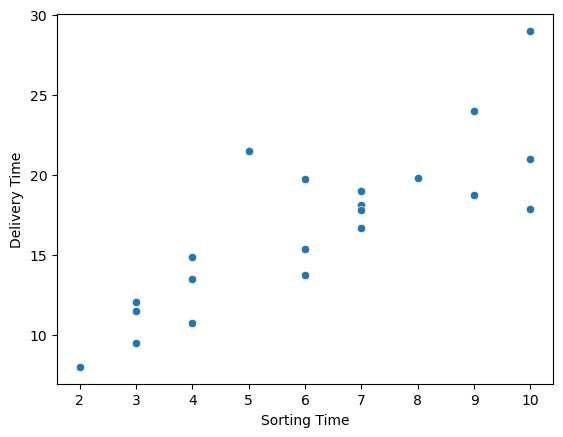

In [13]:
sn.scatterplot(x=df['Sorting Time'],y=df['Delivery Time'])

<AxesSubplot:>

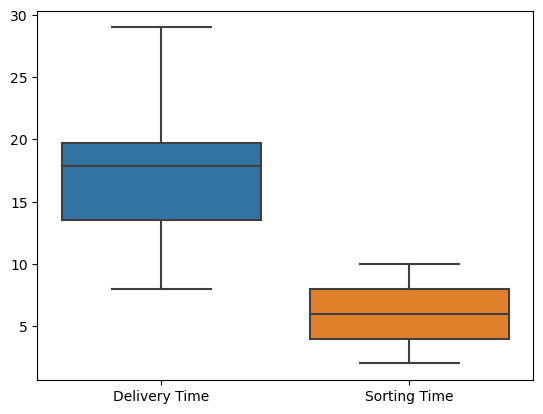

In [14]:
sn.boxplot(df)

In [15]:
### Checking Correlation
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Its highly correlated as 0.82 is close to 1

In [16]:
# Fitting linear regression model
model=smf.ols('Q("Delivery Time")~Q("Sorting Time")',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        13:12:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5827      1.722      3.823      0.001       2.979      10.186
Q("Sorting Time")     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Using Log Trasformation
model_log=smf.ols('Q("Delivery Time")~np.log(Q("Sorting Time"))',data=df).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        13:12:44   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Q("Sorting Time"))     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Using square Trasformation
model_square=smf.ols('Q("Delivery Time")~np.square(Q("Sorting Time"))',data=df).fit()
model_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.74e-05
Time:                        13:12:44   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Q("Sorting Time"))     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Using square root Trasformation
model_sqrt=smf.ols('Q("Delivery Time")~np.sqrt(Q("Sorting Time"))',data=df).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.61e-06
Time:                        13:12:45   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Q("Sorting Time"))     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Using exponential Trasformation
model_exp=smf.ols('Q("Delivery Time")~np.exp(Q("Sorting Time"))',data=df).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 02 Nov 2022   Prob (F-statistic):            0.00396
Time:                        13:12:45   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(Q("Sorting Time"))     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [22]:
# Using x + x^2 Trasformation

# Creating a new column having values x+x^2
df['x + x^2']=df['Sorting Time']+np.square(df['Sorting Time'])
df.head()

,Delivery Time,Sorting Time,x + x^2
0,21.00,10,110
1,13.50,4,20
2,19.75,6,42
3,24.00,9,90
4,29.00,10,110


In [23]:
model_sum=smf.ols('Q("Delivery Time")~Q("x + x^2")',data=df).fit()
model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     33.11
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.52e-05
Time:                        13:12:45   Log-Likelihood:                -52.802
No. Observations:                  21   AIC:                             109.6
Df Residuals:                      19   BIC:                             111.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.8961      1.233      8.837      0.000       8.316      13.477
Q("x + x^2")     0.1163      0.020      5.754      0.000       0.074       0.159
==============================================================================
Omnibus:                        1.668   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                0.842
Skew:                           0.489   Prob(JB):                        0.657
Kurtosis:                       3.080   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Comparing Scores
pd.DataFrame({'Transformation':['No Trans','Log','Square','Sqrt','Exponential','x + x^2'],
              'Scores':[model.rsquared,model_log.rsquared,model_square.rsquared,model_sqrt.rsquared,model_exp.rsquared,model_sum.rsquared]
              })

,Transformation,Scores
0,No Trans,0.682271
1,Log,0.695443
2,Square,0.630287
3,Sqrt,0.695806
4,Exponential,0.361118
5,x + x^2,0.635393


Seems like two of them have higher score<br>
1. Log Transformation
2. Square root Transformation

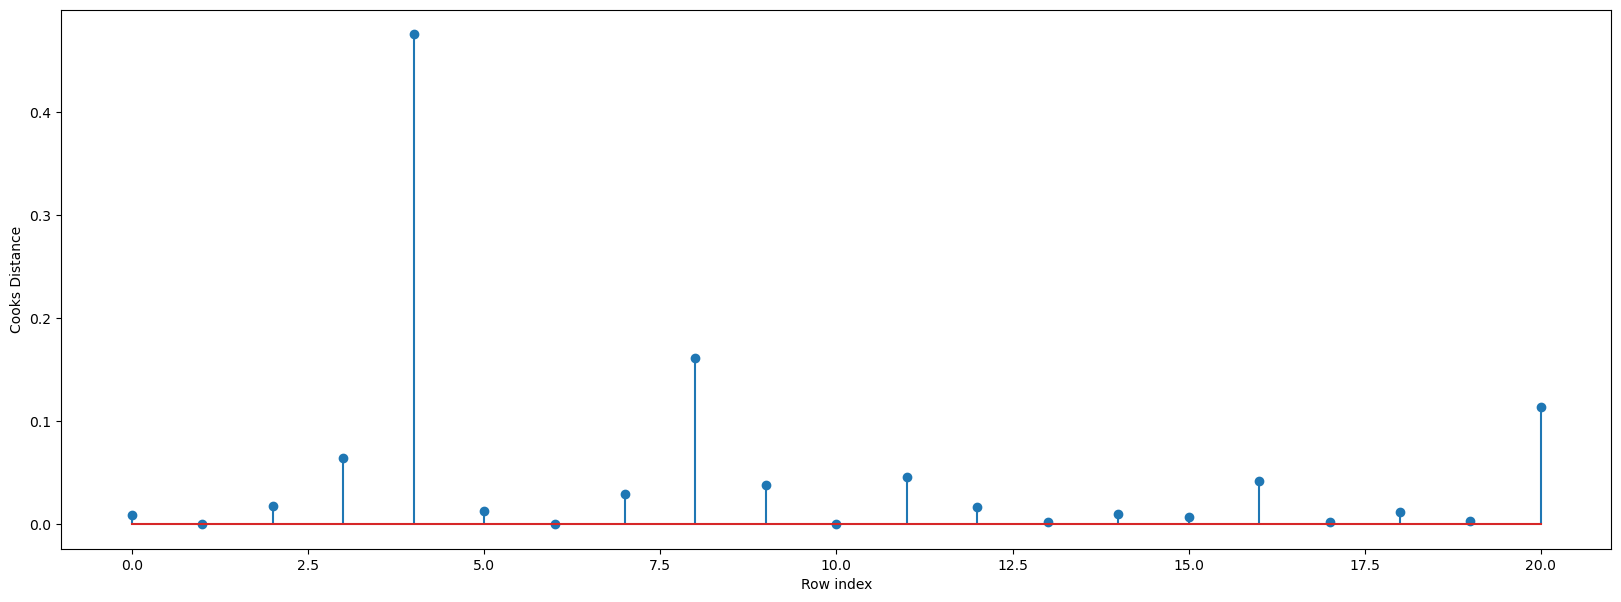

In [25]:
# 1. Checking if outlier present in data after log Transformation

model_influence = model_log.get_influence()
(c, _) = model_influence.cooks_distance
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [26]:
# filtering outliers and Making a new dataframe
log_df=df.iloc[np.where(c<=3*2/len(df['Sorting Time']))]

# fitting new data to Linear model 
model_log1=smf.ols('Q("Delivery Time")~np.log(Q("Sorting Time"))',data=log_df).fit()
model_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     46.07
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.34e-06
Time:                        13:12:45   Log-Likelihood:                -44.547
No. Observations:                  20   AIC:                             93.09
Df Residuals:                      18   BIC:                             95.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.5912      2.071      1.251      0.227      -1.759       6.942
np.log(Q("Sorting Time"))     7.9948      1.178      6.788      0.000       5.520      10.469
==============================================================================
Omnibus:                        5.313   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.096
Skew:                           0.884   Prob(JB):                        0.213
Kurtosis:                       3.766   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

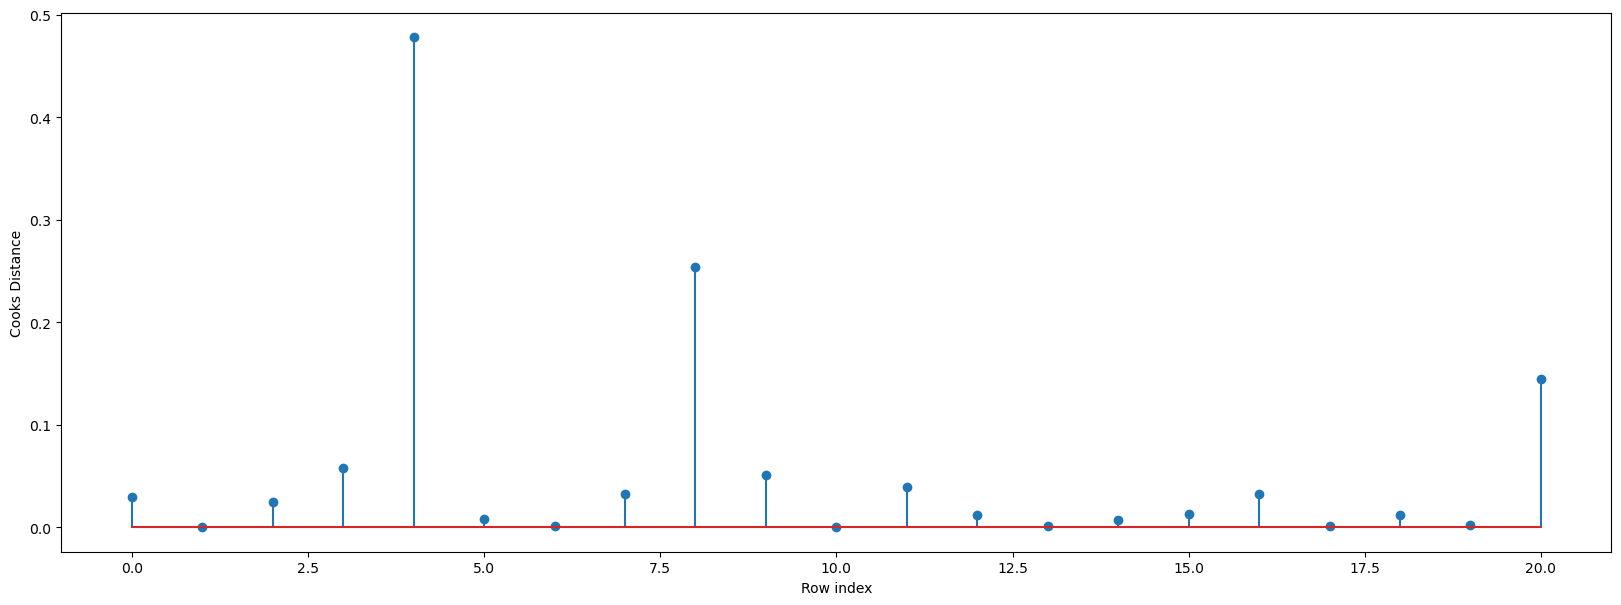

In [27]:
# Repeating previous process for Square root transformation

model_influence = model_sqrt.get_influence()
(c, _) = model_influence.cooks_distance
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
sqrt_df=df.iloc[np.where(c<=3*2/len(df['Sorting Time']))]

model_sqrt1=smf.ols('Q("Delivery Time")~np.sqrt(Q("Sorting Time"))',data=sqrt_df).fit()
model_sqrt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     41.39
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           4.70e-06
Time:                        13:12:45   Log-Likelihood:                -45.306
No. Observations:                  20   AIC:                             94.61
Df Residuals:                      18   BIC:                             96.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.5436      2.657     -0.205      0.840      -6.126       5.039
np.sqrt(Q("Sorting Time"))     6.9784      1.085      6.433      0.000       4.699       9.257
==============================================================================
Omnibus:                        6.224   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                3.802
Skew:                           0.963   Prob(JB):                        0.149
Kurtosis:                       3.922   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we saw, After removing those outlier from the model where Log transformatation is done, gives higher accuracy.<br>Which means we should Choose Log transformation right!<br><br>
But here is the catch, Note the p value of intercept is 0.227 which is greater than 0.05.<br>So we simply reject Log Transformation as well as square root transformation

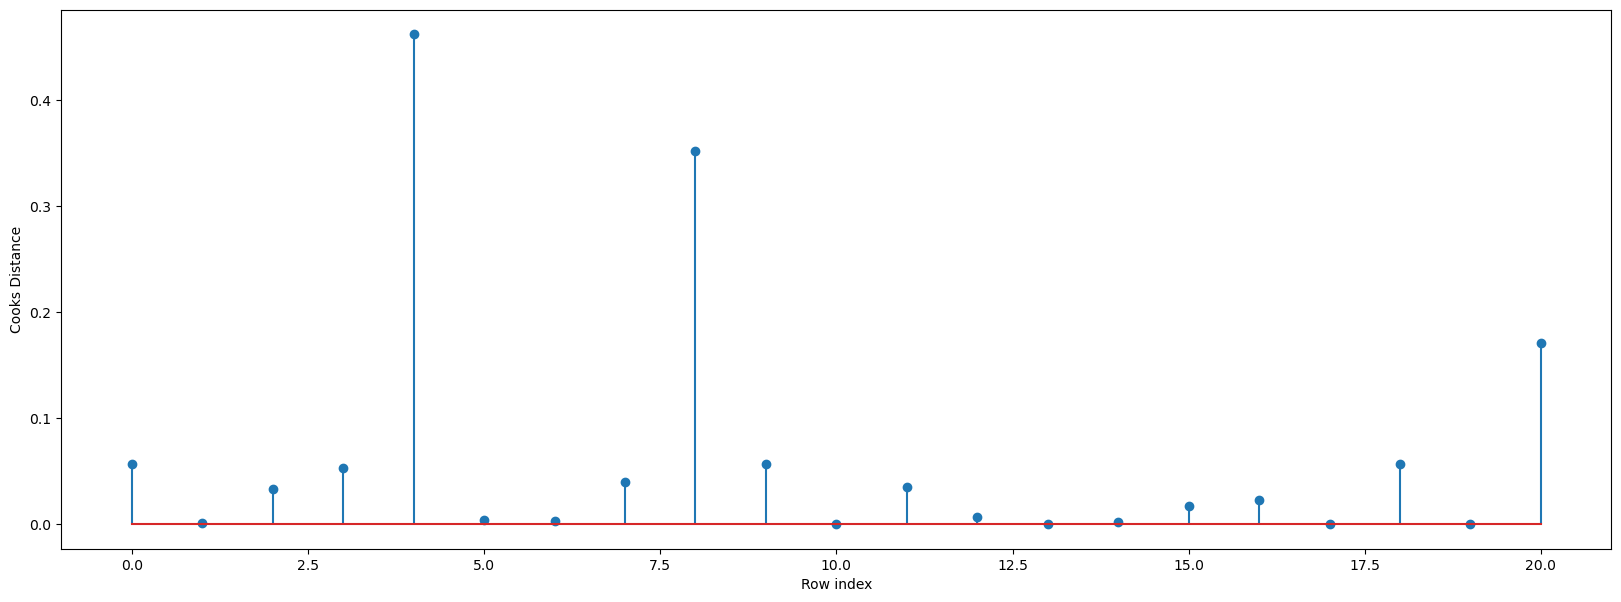

In [29]:
# Looks like we have to consider without Transformation
# Checking if outliers present in it
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
new_df=df.iloc[np.where(c<=3*2/len(df['Sorting Time']))]

model1=smf.ols('Q("Delivery Time")~Q("Sorting Time")',data=new_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     42.46
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           5.28e-06
Time:                        13:12:46   Log-Likelihood:                -42.891
No. Observations:                  19   AIC:                             89.78
Df Residuals:                      17   BIC:                             91.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.7323      1.542      4.366      0.000       3.479       9.985
Q("Sorting Time")     1.6163      0.248      6.516      0.000       1.093       2.140
==============================================================================
Omnibus:                        8.911   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.059
Skew:                           1.208   Prob(JB):                       0.0483
Kurtosis:                       4.347   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing outliers scores increases from 0.68 to 0.714

In [31]:
model1.params

Intercept            6.732254
Q("Sorting Time")    1.616338
dtype: float64

#### Finally we made a linear regression model where 
- Intercept = 6.732
- Slope = 1.616


In [32]:
df.head()

,Delivery Time,Sorting Time,x + x^2
0,21.00,10,110
1,13.50,4,20
2,19.75,6,42
3,24.00,9,90
4,29.00,10,110


In [33]:
df.drop('x + x^2',axis=1,inplace=True)

In [34]:
df['Predicted Delivery Time']=np.around(model1.predict(df['Sorting Time']),2)

In [35]:
df

,Delivery Time,Sorting Time,Predicted Delivery Time
0,21.00,10,22.90
1,13.50,4,13.20
2,19.75,6,16.43
3,24.00,9,21.28
4,29.00,10,22.90
5,15.35,6,16.43
6,19.00,7,18.05
7,9.50,3,11.58
8,17.90,10,22.90
9,18.75,9,21.28
